In [1]:
# 기본 import 패키지
from IPython.display import display
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from cycler import cycler
# pip install mglearn 실행해야 함.
import mglearn

%matplotlib inline

# 한글출력
matplotlib.rc('font', family='D2Coding')
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['savefig.dpi'] = 150
plt.rcParams['figure.dpi'] = 150
plt.rcParams['image.interpolation'] = "none"
plt.rcParams['savefig.bbox'] = "tight"
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['legend.numpoints'] = 1
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rc('axes', prop_cycle=(
    cycler('color', mglearn.plot_helpers.cm_cycle.colors) +
    cycler('linestyle', ['-', '-', "--", (0, (3, 3)), (0, (1.5, 1.5))])))


np.set_printoptions(precision=3, suppress=True)

pd.set_option("display.max_columns", 8)
pd.set_option('precision', 2)

### 2.3.8 신경망(딥러닝)
* 신경망이라 알려진 알고리듬들이 최근 '딥러닝<sup>deep learning</sup>'이란 이름으로 다시 주목받고 있다.
* 딥러닝이 많은 머신러닝 어플리케이션에서 매우 좋은 성과를 보여주었지만 특정 분야에 정교하게 적용되어 있는 경우가 많다.
* 여기서는 복잡한 딥러닝 알고리즘의 출발점이며 비교적 간단하게 분류와 회귀에 쓸 수 있는 **다중 퍼셉트론**<sup>multilayer perceptrons,MLP</sup>를 다룬다.
* 다중 퍼셉트론은 기본 피드포워드<sup>feed-forward</sup>신경망, 또는 그냥 신경망이라고도 함  

### 신경망 모델
MLP는 여러 단계를 거쳐 결정을 만들어내는 선형 모델의 일반화된 모습이라고 볼 수 있다. 

선형 모델의 예측 공식은 다음과 같다.  

$$ \hat{y}=w[0]\times x[0]+w[1]\times x[1]+...+w[p]\times x[p]+b $$

$\hat{y}$은 x[0]에서 x[p]까지의 입력 특성과 w[0]에서 w[p]까지 학습된 계수의 가중치 합이다. 그림으로 나타내면 아래와 같다.

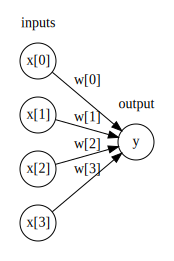

In [2]:
display(mglearn.plots.plot_logistic_regression_graph())

그림 2-44 입력 특성과 예측은 노드<sup>node</sup>로, 계수는 노드사이의 연결로 나타낸 로지스틱 회귀  

MLP에서는 가중치 합을 만드는 과정이 여러 번 반복되며, 먼저 중간 단계를 구성하는 **은닉 유닛** <sup>hidden unit</sup>을 계산하고 이를 이용해 최종 가중치 합을 계산한다. 이런 모델은 많은 계수(가중치)를 학습해야 하며 이 계수는 각 입력과 은닉층사이, 은닉층과 출력 사이마다 있다.

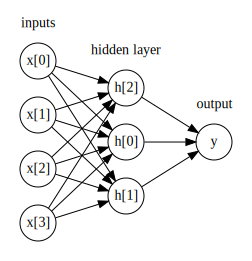

In [3]:
mglearn.plots.plot_single_hidden_layer_graph()

그림 2-45 은닉층이 하나인 다층 퍼셉트론
  
* 여러 개의 가중치 합을 계산하는 것은 수학적으로 하나의 가중치 합을 계산하는 것과 같다(단순 선형 함수이기 때문). 
* 선형 모델보다 강력하게 만들려면 각 은닉 유닛의 가중치 합을 계산한 후 그 결과의 비선형 함수인 **렐루**<sup>rectified linear unit, ReLU</sup>나 **하이퍼볼릭 탄젠트** <sup>hyperbolic tangent, tanh</sup>를 적용한다. 
* 두 함수는 아래 그림과 같다. 이런 비선형 함수를 이용해 신경망이 선형 모델보다 더 복잡한 함수를 학습할 수 있다.


Text(0,0.5,'relu(x), tanh(x)')

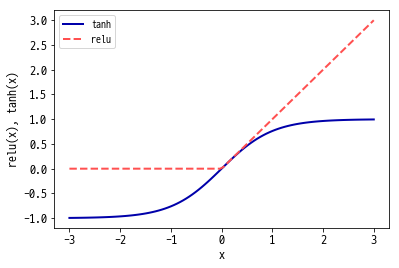

In [2]:
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, np.maximum(line, 0), linestyle='--', label="relu")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x), tanh(x)")

그림 2-46 하이퍼볼릭 탄젠트 활성화 함수와 렐루 활성화 함수
  
위의 신경망으로 (tanh 함수를 비선형 함수로 사용해서) 회귀분석을 할 때 $\hat y$를 계산하는 전체 공식은 다음과 같다.

$$h[0]=\tanh(w[0,0] \times x[0]+w[1,0] \times x[1]+w[2,0] \times x[2]+w[3,0] \times x[3]+b[0])$$$$h[1]=\tanh(w[0,1] \times x[0]+w[1,1] \times x[1]+w[2,1] \times x[2]+w[3,1] \times x[3]+b[1])$$$$h[1]=\tanh(w[0,2] \times x[0]+w[1,2] \times x[1]+w[2,2] \times x[2]+w[3,2] \times x[3]+b[2])$$$$\hat y=v[0] \times h[0]+v[1] \times h[1]+v[2] \times h[2]+b$$  

w: 입력 x와 은닉층 h 사이의 가중치, v: 은닉층과 출력 사이의 가중치  

보통 분류의 경우 신경망 마지막 출력층에 시그모이드(이진 분류)나 소프트맥스(다중 분류) 함수를 적용하여 최종출력 $\hat y$를 계산한다. 소프트맥스는 여러 유닛의 출력값을 정규화하기 위한 함수로 $${e^{z_j}\over{\sum_{i=1}^k}e^{z_i}}$$와 같이 나타낸다. (z는 각 유닛의 출력값, k는 유닛 개수)  

은닉층의 유닛 개수와 은닉층의 수를 정하는 것이 중요하다. 이렇게 많은 은닉층으로 구성된 대규모의 신경망이 생기면서 이를 **딥러닝**이라고 부르게 되었다.

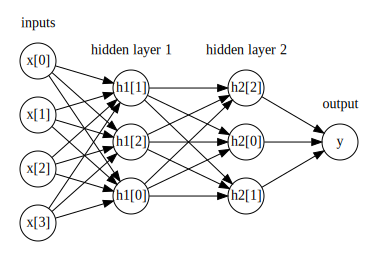

In [5]:
mglearn.plots.plot_two_hidden_layer_graph()

### 신경망 튜닝

two_moon 데이터셋에 다층 퍼셉트론(MLP) 구현인 MLPClassifier를 적용해 보자.

Text(0,0.5,'특성 1')

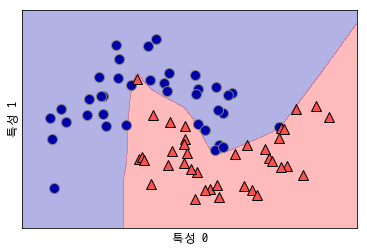

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=42)
# solver='adam' (default)
mlp = MLPClassifier(hidden_layer_sizes=100, solver='lbfgs', activation='relu',random_state=0).fit(X_train, y_train)
# ==>  은닉 유닛 = 100개 임

mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

* 사용된 최적화 알고리즘은 lbfgs이다. 
* MLP는 기본적으로 은닉 유닛 100개를 사용하는데, 이런 작은 데이터셋에서는 개수를 줄여도 여전히 좋은 결과를 얻을 수 있다.(모델의 복잡도는 낮아진다.) 
* 은닉 유닛이 10개인 경우 결정 경계가 더 날카로워졌다. 기본 비선형 함수는 ReLU이다. 
* 더 매끄러운 결정 경계를 원한다면 은닉 유닛을 추가하거나, 은닉층을 추가하거나 비선형 함수를 tanh로 사용할 수 있다.

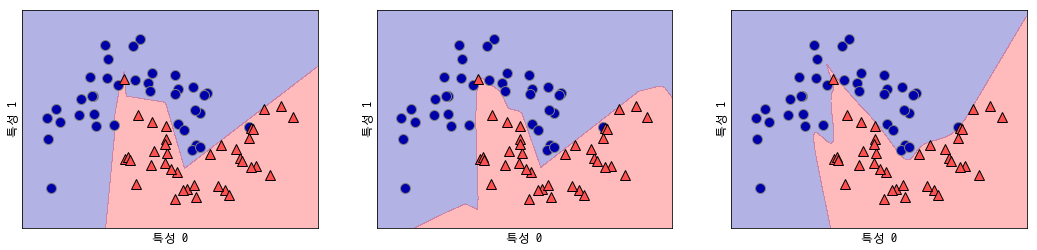

In [14]:

fig, axes = plt.subplots(1, 3, figsize=(18, 4))

mlp = [MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10]), # 은닉유닛 10개, activation=relu(default)
       MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10, 10]), # 은닉층 2개, activation=relu(default)
       MLPClassifier(solver='lbfgs', activation='tanh', random_state=0, hidden_layer_sizes=[10, 10]) # tanh 활성화 함수
      ]

for n, ax in zip([0, 1, 2], axes):
    mlp[n].fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp[n], X_train, ax=ax, fill=True, alpha=.3)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")

* 또한, 릿지 회귀와 선형 분류기에서 한 것처럼 L2 패널티를 사용해서 가중치를 0에 가깝게 감소시켜 모델의 복잡도를 제어할 수 있다. 
* MLPClassifier에서 이런 역할을 선형 회귀 모델에서와 같이 alpha 인자가 한다. 
* 기본값은 매우 낮게 (거의 규제하지 않게) 되어 있다. 아래는 각각 은닉층 10개와 100개일 때 alpha 값이 미치는 영향을 보여준다.

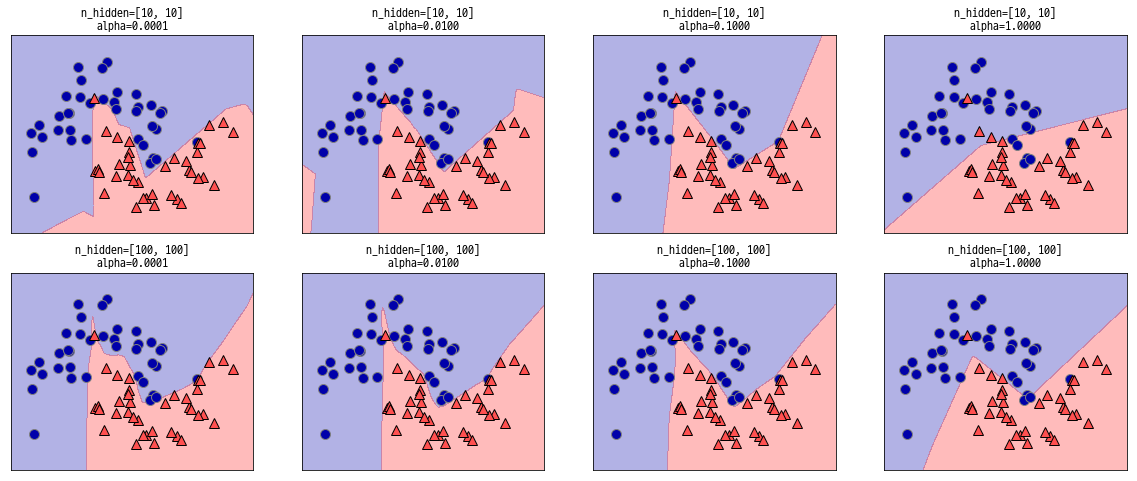

In [12]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0,
                            hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],
                            alpha=alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
        ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(
                      n_hidden_nodes, n_hidden_nodes, alpha))

신경망의 복잡도를 제어하는 방법에는 **은닉층의 수, 은닉 유닛 개수, 규제(alpha), 드롭아웃** 등이 있다.


**신경망에서는 학습을 시작하기 전 가중치를 무작위로 설정하며 이 값이 학습에 영향을 준다. 같은 매개변수를 사용하더라도 초깃값이 다르면 모델이 달라질 수 있다**.
아래는 같은 매개변수지만 초기화를 다르게 한 모델들이다.

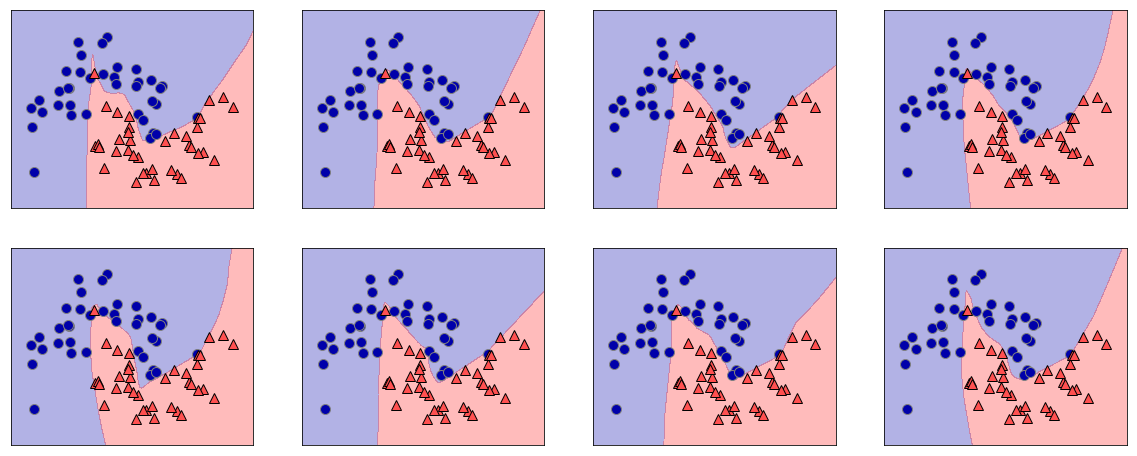

In [13]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs', random_state=i,
                        hidden_layer_sizes=[100, 100])
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)

유방암 데이터셋에 MLPClassifier를 적용한다. 매개변수는 기본값을 사용한다.

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

print("유방암 데이터의 특성별 최대값:\n{}".format(cancer.data.max(axis=0)))
# 스케일이 다양함

유방암 데이터의 특성별 최대값:
[  28.11    39.28   188.5   2501.       0.163    0.345    0.427    0.201
    0.304    0.097    2.873    4.885   21.98   542.2      0.031    0.135
    0.396    0.053    0.079    0.03    36.04    49.54   251.2   4254.
    0.223    1.058    1.252    0.291    0.664    0.207]


In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print("훈련 세트 정확도: {:.2f}".format(mlp.score(X_train, y_train)))
print("테스트 세트 정확도: {:.2f}".format(mlp.score(X_test, y_test)))

훈련 세트 정확도: 0.91
테스트 세트 정확도: 0.88


정확도를 높이기 위해서는 SVC 예제에서처럼 스케일을 맞추어야 한다. 모든 입력 특성을 평균 0, 분산 1이 되도록 정규화 시키는 것이 좋다.(이를 자동으로 처리해주는 StandardScaler가 있다.) 이를 위해서 데이터에서 평균을 빼고 표준편차로 나누어 z-score를 사용한다.

In [19]:
# 훈련 세트 각 특성의 평균을 계산합니다
mean_on_train = X_train.mean(axis=0)
# 훈련 세트 각 특성의 표준 편차를 계산합니다
std_on_train = X_train.std(axis=0)

# 데이터에서 평균을 빼고 표준 편차로 나누면
# 평균 0, 표준 편차 1 인 데이터로 변환됩니다.
X_train_scaled = (X_train - mean_on_train) / std_on_train
# (훈련 데이터의 평균과 표준 편차를 이용해) 같은 변환을 테스트 세트에도 합니다
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.991
테스트 세트 정확도: 0.965


C:\Users\research\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


정확도가 높아졌다. 최대 반복 횟수에 도달했다는 경고는 모델을 학습시키는 adam 알고리즘에 관한 것으로 반복 횟수를 늘려줘야 한다.

In [20]:
mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.993
테스트 세트 정확도: 0.972


알파 매개변수를 0.0001에서 1로 크게 증가시켜 모델의 복잡도를 낮추어보자. 훈련 데이터와 테스트 데이터의 차이가 줄어든다.

In [22]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.972


이는 지금까지 가장 좋은 모델의 성능과 동일하다.
  
신경망의 분석은 선형 모델이나 트리 모델보다 까다롭다. 모델의 가중치 값을 통해 어떤 특성이 학습되었는지 확인할 수 있다. 모든 은닉 유닛에서 작은 가중치를 가진 특성은 모델에 덜 중요하다고 추론할 수 있다.  

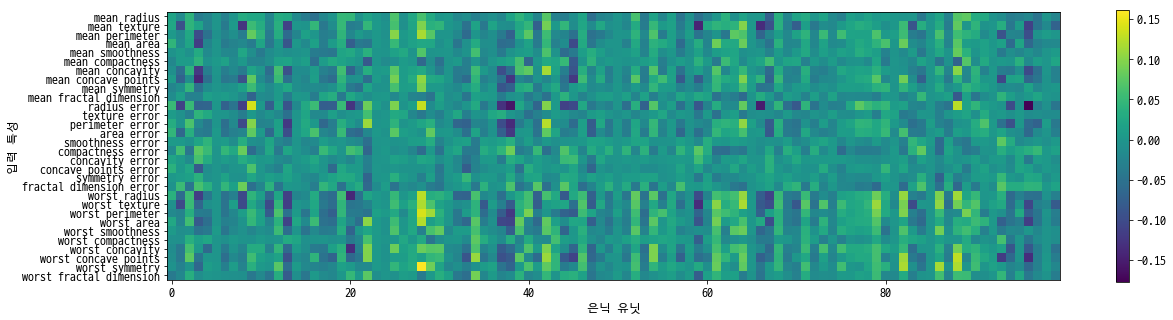

In [24]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("은닉 유닛")
plt.ylabel("입력 특성")
plt.colorbar()

* scikit-learn에서 제공하는 MLPClassifier와 MLPRegressor는 최근 유행하는 합성곱 신경망(CNN, convolutional neural network)이나 순환 신경망(RNN, recurrent neural network)을 제공하지 않는다. 
* 더 복잡하고 대규모 모델을 만들기 위해선 전문 딥러닝 라이브러리를 사용해야 한다.
* 파이썬에서는 keras, tensorflow, PyTorch 등이 널리 사용된다. 추가로 이런 라이브러리에서는 GPU 가속을 지원한다.

### 장단점과 매개변수
* 장점: 대량의 데이터에 내재된 정보를 잡아내어 매우 복잡한 모델을 만들 수 있다. 충분한 시간과 데이터를 주고 매개변수를 조정하면 다른 알고리즘을 능가하는 성능을 낸다.
* 단점: 크고 강력한 모델에서는 학습이 오래 걸리며 데이터 전처리가 필요하다. 매개변수 튜닝이 어렵다.
  
  
### 신경망의 복잡도 추정
신경망의 가장 중요한 매개변수는 은닉층의 개수와 유닛 수이다. 처음엔 1~2개 층에서 시작해서 늘려가야 한다. 은닉유닛 수는 보통 입력 특성의 수와 비슷하게 설정하지만 수천 초중반을 넘는 일은 거의 없다.

신경망의 매개변수를 조정하는 일반적인 방법은 충분히 과적합될만한 큰 모델을 만든 뒤 신경망 구조를 줄이거나 규제를 강화해 일반화 성능을 향상시키는 것이다.

* solver 매개변수: 기본값은 adam으로 대부분 잘 작동하지만 데이터 스케일에 조금 민감하다. lbfgs는 안정적이지만 규모가 큰 모델이나 대량의 데이터셋에는 시간이 오래 걸린다. sgd는 다른 여러 매개변수와 함께 튜닝하여 최선의 결과를 만들 수 있다.

BFGS : 연구자 Broyden-Fletcher-Goldfarb-Shanno의 이름을 딴 의사 뉴턴 메서드 중 하나. L-BFGS(Limited-memory BFGS)는 이 알고리즘을 제한된 메모리에서 구현한 방법이다.

## 2.4 분류 예측의 불확실성 추정
* scikit-learn 분류기에서 불확실성을 추정할 수 있는 함수가 두 개 있습니다. decision_function과 predict_proba입니다. 
* 대부분의(전체는 아니고) 분류 클래스는 적어도 둘 중 하나를 제공하고 두 함수를 모두 제공하는 경우도 많습니다.   

인위적으로 만든 2차원 데이터셋을 사용해 GradientBoostingClassifier 분류기의 decision_function과 predict_proba 메서드가 어떤 역할을 하는지 살펴보겠습니다.

In [20]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles
X, y = make_circles(noise=0.25, factor=0.5, random_state=1) # 원 안에 원을 만드는 함수

# 예제를 위해 클래스의 이름을 "blue"와 "red"로 바꿉니다.
y_named = np.array(["blue", "red"])[y]

# 여러 배열을 한꺼번에 train_test_split에 넣을 수 있습니다.
# 훈련 세트와 테스트 세트로 나뉘는 방식은 모두 같습니다.
X_train, X_test, y_train_named, y_test_named, y_train, y_test = \
    train_test_split(X, y_named, y, random_state=0)

# 그래디언트 부스팅 모델을 만듭니다.
gbrt = GradientBoostingClassifier(random_state=0) # default max_depth=3, learning_rate=0.1, n_estimators = 100
gbrt.fit(X_train, y_train_named)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)

#### 2.4.1 결정 함수
이진 분류에서 decision_function 반환값의 크기는 (n_samples,)이며 각 샘플이 하나의 실수 값을 반환합니다.

In [21]:
print("X_test.shape:", X_test.shape)
print("Decision function shape:",
      gbrt.decision_function(X_test).shape)

X_test.shape: (25, 2)
Decision function shape: (25,)


In [34]:
 X_test.shape

(25, 2)

* 이 값은 모델이 데이터 포인트가 양성 클래스인 클래스 1에 속한다고 믿는 정도입니다. 
* 양수 값은 양성 클래스를 의미하며 음수 값은 음성 (즉 다른) 클래스를 의미합니다.

In [23]:
# 결정 함수 결과 중 앞부분 일부를 확인합니다.
print("결정 함수:\n{}".format(gbrt.decision_function(X_test)[:6]))

결정 함수:
[ 4.136 -1.702 -3.951 -3.626  4.29   3.662]


즉, 결정 함수의 부호만 보고 예측 결과를 알 수 있습니다.

In [24]:
print("임계치와 결정 함수 결과 비교:\n{}".format(gbrt.decision_function(X_test) > 0))
print("예측:\n{}".format(gbrt.predict(X_test)))

임계치와 결정 함수 결과 비교:
[ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]
예측:
['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


이진 분류에서 음성 클래스는 항상 classes_ 속성의 첫 번째 원소이고 양성 클래스는 classes_의 두 번째 원소입니다. 그래서 predict 함수의 결과를 완전히 재현하려면 classes_ 속성을 사용하면 됩니다.

In [26]:
# 불리언 값을 0과 1로 변환합니다.
greater_zero = (gbrt.decision_function(X_test) > 0).astype(int)
# classes_에 인덱스로 사용합니다.
pred = gbrt.classes_[greater_zero] # array(['blue', 'red'], dtype='<U4')
# pred와 gbrt.predict의 결과를 비교합니다.
print("pred는 예측 결과와 같다: {}".format(
    np.all(pred == gbrt.predict(X_test))))

pred는 예측 결과와 같다: True


In [32]:
greater_zero

array([1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0])

In [33]:
pred

array(['red', 'blue', 'blue', 'blue', 'red', 'red', 'blue', 'red', 'red',
       'red', 'blue', 'red', 'red', 'blue', 'red', 'blue', 'blue', 'blue',
       'red', 'red', 'red', 'red', 'red', 'blue', 'blue'], dtype='<U4')

decision_function 값의 범위는 데이터와 모델 파라미터에 따라 달라집니다.

In [36]:
decision_function = gbrt.decision_function(X_test)
print("결정 함수 최솟값: {:.2f} 최댓값: {:.2f}".format(
    np.min(decision_function), np.max(decision_function)))

결정 함수 최솟값: -7.69 최댓값: 4.29


decision_function의 출력 범위가 임의의 값이라 이해하긴 어렵습니다.  

다음 예에서 2차원 평면의 모든 점에 대해 decision_function의 값을 색으로 표현하여 앞서 본 결정 경계와 함께 그래프로 나타내보겠습니다. 훈련 데이터는 원 모양이고 테스트 데이터는 삼각형입니다(그림 2-55).

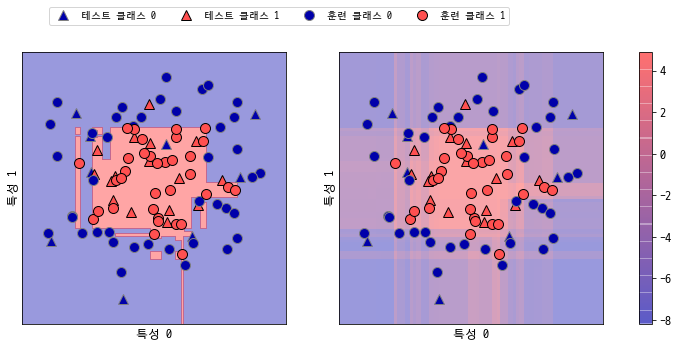

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4,
                                fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1],
                                            alpha=.4, cm=mglearn.ReBl)

for ax in axes:
    # 훈련 포인트와 테스트 포인트를 그리기
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test,
                             markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train,
                             markers='o', ax=ax)
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
cbar = plt.colorbar(scores_image, ax=axes.tolist())
axes[0].legend(["테스트 클래스 0", "테스트 클래스 1", "훈련 클래스 0",
                "훈련 클래스 1"], ncol=4, loc=(.1, 1.1))

그림 2-55 2차원 예제 데이터셋을 사용해 만든 그래디언트 부스팅 모델의 결정 경계(좌)와 결정 함수(우)  

예측한 결과뿐만 아니라 분류기가 얼마나 확신하는지를 알면 추가 정보를 얻게 됩니다. 그러나 결정 함수 그래프에서 두 클래스 사이의 경계를 구분하기는 어렵습니다.

### 2.4.2 예측 확률
predict_proba의 출력은 각 클래스에 대한 확률이고 decision_function의 출력보다 이해하기 더 쉽습니다. 이 값의 크기는 이진 분류에서는 항상 (n_samples, 2)입니다.

In [38]:
print("확률 값의 형태: {}".format(gbrt.predict_proba(X_test).shape))

확률 값의 형태: (25, 2)


각 행의 첫 번째 원소는 첫 번째 클래스의 예측 확률이고 두 번째 원소는 두 번째 클래스의 예측 확률입니다. 
확률이기 때문에 predict_proba의 출력은 항상 0과 1 사이의 값이며 두 클래스에 대한 확률의 합은 항상 1입니다.

In [39]:
# predict_proba 결과 중 앞부분 일부를 확인합니다.
print("예측 확률:\n{}".format(gbrt.predict_proba(X_test[:6])))

예측 확률:
[[0.016 0.984]
 [0.846 0.154]
 [0.981 0.019]
 [0.974 0.026]
 [0.014 0.986]
 [0.025 0.975]]


두 클래스의 확률 합은 1이므로 두 클래스 중 하나는 50% 이상의 확신을 가질 것이 틀림없습니다. 그리고 바로 그 클래스가 예측값이 된다.  

* 앞의 출력값을 보면 분류기가 대부분의 포인트에서 비교적 강하게 확신하고 있습니다. 데이터에 있는 불확실성이 얼마나 이 값에 잘 반영되는지는 모델과 매개변수 설정에 달렸습니다. 
* 과대적합된 모델은 혹 잘못된 예측이더라도 예측의 확신이 강한 편입니다. 일반적으로 복잡도가 낮은 모델은 예측에 불확실성이 더 많습니다. 이런 불확실성과 모델의 정확도가 동등하면 이 모델이 **보정**<sup>calibration</sup>되었다고 합니다. 
* 즉 보정된 모델에서 70% 확신을 가진 예측은 70%의 정확도를 낼 것입니다.
  
다음 예에서 앞에서와 같은 데이터셋을 사용해 결정 경계와 클래스 1의 확률을 그려보겠습니다(그림 2-56).  

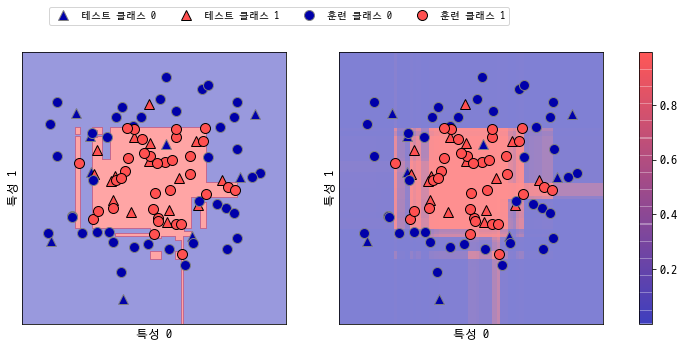

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))

mglearn.tools.plot_2d_separator(
    gbrt, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(
    gbrt, X, ax=axes[1], alpha=.5, cm=mglearn.ReBl, function='predict_proba')

for ax in axes:
    # 훈련 포인트와 테스트 포인트를 그리기
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test,
                             markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train,
                             markers='o', ax=ax)
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
cbar = plt.colorbar(scores_image, ax=axes.tolist())
axes[0].legend(["테스트 클래스 0", "테스트 클래스 1", "훈련 클래스 0",
                "훈련 클래스 1"], ncol=4, loc=(.1, 1.1))

그림 2-56.  그림 2-55의 그래디언트 부스팅 모델의 결정 경계(좌)와 예측 확률(우)  

이 그래프의 경계는 훨씬 잘 나타나 있으며 불확실성이 있는 작은 영역들도 잘 확인할 수 있습니다.

scikit-learn 웹사이트(http://bit.ly/2cqCYx6)에 많은 모델의 불확실성 추정이 어떤지 잘 비교해놓았습니다. 이 그래프를 [그림 2-57]에 옮겨봤습니다. 웹사이트에 있는 예제도 한번 살펴보길 권합니다.


![](https://tensorflowkorea.files.wordpress.com/2017/06/2-57.png?w=1025)

그림 2-57 인위적으로 만든 데이터셋을 사용한 scikit-learn의 여러 분류기의 비교

### 2.4.3 다중 분류에서의 불확실성

이제까지 이진 분류에서 불확실성 추정에 관해 이야기했습니다. 하지만 decision_function과 predict_proba 메서드는 다중 분류에도 사용할 수 있습니다. 클래스가 세 개인 iris 데이터셋에 적용해보겠습니다.

In [41]:
from sklearn.datasets import load_iris

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=42)

gbrt = GradientBoostingClassifier(learning_rate=0.01, random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)

In [42]:
print("결정 함수의 결과 형태: {}".format(gbrt.decision_function(X_test).shape))
# decision function 결과 중 앞부분 일부를 확인합니다.
print("결정 함수 결과:\n{}".format(gbrt.decision_function(X_test)[:6, :]))

결정 함수의 결과 형태: (38, 3)
결정 함수 결과:
[[-0.529  1.466 -0.504]
 [ 1.512 -0.496 -0.503]
 [-0.524 -0.468  1.52 ]
 [-0.529  1.466 -0.504]
 [-0.531  1.282  0.215]
 [ 1.512 -0.496 -0.503]]


다중 분류에서는 decision_function의 결괏값의 크기는 (n_samples, n_classes)입니다. 각 열은 각 클래스에 대한 확신 점수를 담고 있습니다. 수치가 크면 그 클래스일 가능성이 크고 수치가 작으면 그 클래스일 가능성이 낮습니다. 데이터 포인트마다 점수들에서 가장 큰 값을 찾아 예측 결과를 재현할 수 있습니다.

In [43]:
print("가장 큰 결정 함수의 인덱스:\n{}".format(
    np.argmax(gbrt.decision_function(X_test), axis=1)))
print("예측:\n{}".format(gbrt.predict(X_test)))

가장 큰 결정 함수의 인덱스:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
예측:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


predict_proba의 출력값 크기는 (n_samples, n_classes)로, 앞서 본 것과 같습니다. 마찬가지로 각 데이터 포인트에서 클래스 확률의 합은 1입니다.

In [44]:
# predict_proba 결과 중 앞부분 일부를 확인합니다.
print("예측 확률:\n{}".format(gbrt.predict_proba(X_test)[:6]))
# 행 방향으로 확률을 더하면 1이 됩니다.
print("합: {}".format(gbrt.predict_proba(X_test)[:6].sum(axis=1)))

예측 확률:
[[0.107 0.784 0.109]
 [0.789 0.106 0.105]
 [0.102 0.108 0.789]
 [0.107 0.784 0.109]
 [0.108 0.663 0.228]
 [0.789 0.106 0.105]]
합: [1. 1. 1. 1. 1. 1.]


predict_proba의 결과에 argmax 함수를 적용해서 예측을 재현할 수 있습니다.

In [45]:
print("가장 큰 예측 확률의 인덱스:\n{}".format(
    np.argmax(gbrt.predict_proba(X_test), axis=1)))
print("예측:\n{}".format(gbrt.predict(X_test)))

가장 큰 예측 확률의 인덱스:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
예측:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


* 정리하면, predict_proba와 decision_function의 결괏값 크기는 항상 (n_samples, n_classes)입니다. 
* 이진 분류의 decision_function은 조금 다릅니다. 이진 분류에서는 decision_function은 열이 하나뿐이며 양성 클래스인 classes_[1]에 대응하는 값을 가지고 있습니다. 이는 아마도 오래전부터 내려온 관례 때문입니다.  


* 열이 n_classes개일 때는 열을 가로질러서 argmax 함수를 적용해 예측 결과를 재현할 수 있습니다. 
* 하지만 주의할 것은 클래스가 문자열이거나 또는 정수형을 사용하지만 연속적이지 않고 0부터 시작하지 않을 수 있습니다. 
* predict의 결과와 decision_function이나 predict_proba의 결과를 비교하려면 분류기의 classes_ 속성을 사용해 클래스의 실제 이름을 얻어야 합니다.


In [47]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

# iris 데이터셋의 타깃을 클래스 이름으로 나타내기
named_target = iris.target_names[y_train]
logreg.fit(X_train, named_target)
print("훈련 데이터에 있는 클래스 종류: {}".format(logreg.classes_))
print("예측: {}".format(logreg.predict(X_test)[:10]))
argmax_dec_func = np.argmax(logreg.decision_function(X_test), axis=1)
print("가장 큰 결정 함수의 인덱스: {}".format(argmax_dec_func[:10]))
print("인덱스를 classses_에 연결: {}".format(
       logreg.classes_[argmax_dec_func][:10]))

훈련 데이터에 있는 클래스 종류: ['setosa' 'versicolor' 'virginica']
예측: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']
가장 큰 결정 함수의 인덱스: [1 0 2 1 1 0 1 2 1 1]
인덱스를 classses_에 연결: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']
